In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("employee.csv")

In [3]:
df.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308,6.945,TRUE,Marketing
1,Thomas,Male,61933,NaN,TRUE,NaN
2,Maria,Female,130590,11.858,FALSE,Finance
3,Jerry,Male,NaN,9.34,TRUE,Finance
4,Larry,Male,101004,1.389,TRUE,Client Services


In [4]:
df.isna().sum()

First Name            69
Gender               148
Salary                 2
Bonus %                3
Senior Management     68
Team                  43
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

First Name           0
Gender               0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   First Name         755 non-null    object
 1   Gender             755 non-null    object
 2   Salary             755 non-null    object
 3   Bonus %            755 non-null    object
 4   Senior Management  755 non-null    object
 5   Team               755 non-null    object
dtypes: object(6)
memory usage: 41.3+ KB


In [8]:
df.describe()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
count,755,755,755,755,755,755
unique,199,3,753,743,4,13
top,Marilyn,Female,147183,14.077,TRUE,Business Development
freq,10,385,2,2,376,88


In [9]:
df.dtypes

First Name           object
Gender               object
Salary               object
Bonus %              object
Senior Management    object
Team                 object
dtype: object

In [10]:
df

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308,6.945,TRUE,Marketing
2,Maria,Female,130590,11.858,FALSE,Finance
4,Larry,Male,101004,1.389,TRUE,Client Services
5,Dennis,n.a.,115163,10.125,FALSE,Legal
6,Ruby,Female,65476,10.012,TRUE,Product
...,...,...,...,...,...,...
994,George,Male,98874,4.479,TRUE,Marketing
996,Phillip,Male,42392,19.675,FALSE,Finance
997,Russell,Male,96914,1.421,FALSE,Product
998,Larry,Male,60500,11.985,FALSE,Business Development


In [11]:
df.nunique()

First Name           199
Gender                 3
Salary               753
Bonus %              743
Senior Management      4
Team                  13
dtype: int64

In [43]:
df["Gender"].replace(0,'Male',inplace=True)
df.replace('?',0,inplace=True)
df.replace('n.a.',0,inplace=True)

In [13]:
df['Bonus %'] = df['Bonus %'].astype(float)
df['Salary']=df['Salary'].astype(int)

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

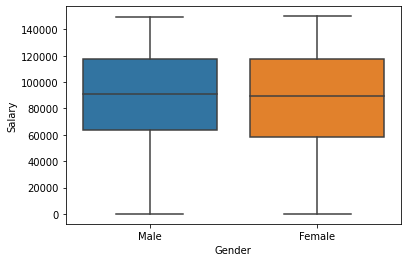

In [62]:
sb.boxplot(x=df['Gender'],y=df['Salary'])

In [15]:
df.dtypes

First Name            object
Gender                object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

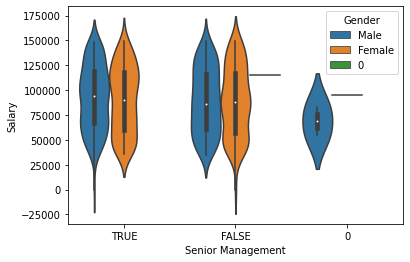

In [17]:
sb.violinplot(x='Senior Management',y='Salary',data=df,hue='Gender');

In [18]:
g=df.corr()

In [19]:
g

,Salary,Bonus %
Salary,1.00000,-0.04652
Bonus %,-0.04652,1.00000


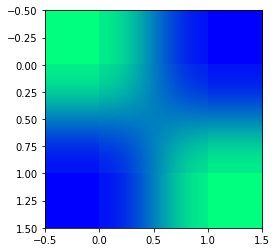

In [20]:
plt.imshow(g, cmap='winter', interpolation='hamming' );

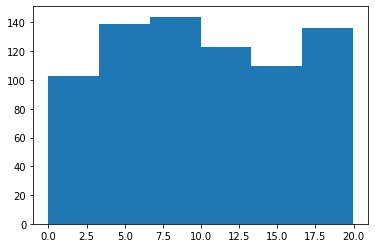

In [21]:
plt.hist(df['Bonus %'], bins=6);

<AxesSubplot:ylabel='Salary'>

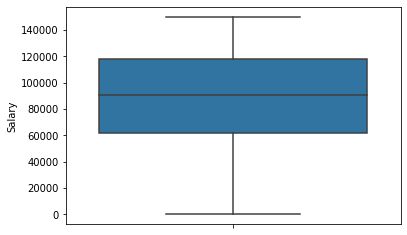

In [29]:
sb.boxplot(y = df['Salary'])

/home/aamruth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


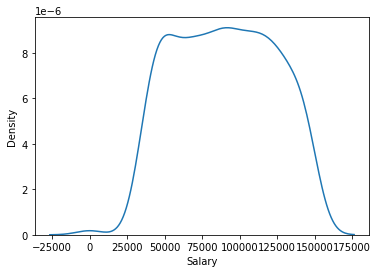

In [60]:
sb.distplot(df['Salary'],kde=True,hist=False,rug=True);

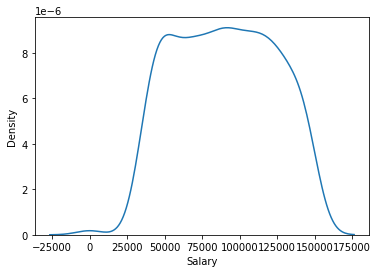

In [38]:
sb.kdeplot(df['Salary']);

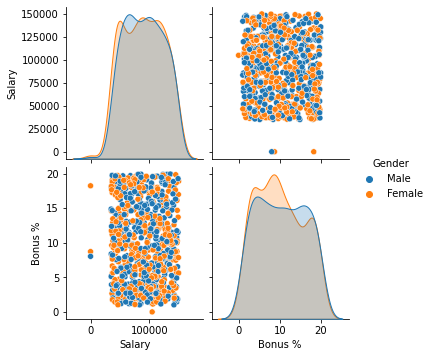

In [45]:
sb.pairplot(df, hue='Gender');

/home/aamruth/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


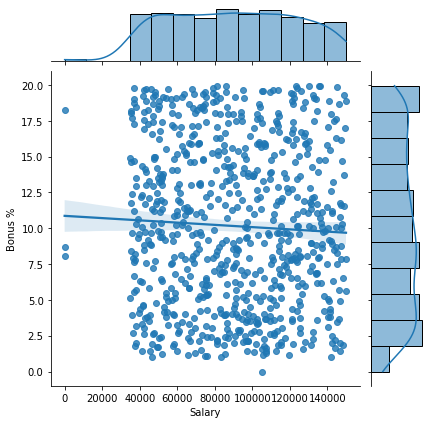

In [52]:
sb.jointplot("Salary", "Bonus %", data=df, kind='reg');